In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm

In [2]:
train_crop_info = pd.read_csv("total_train_crop.csv")

In [19]:
def resize_box(s_X, s_Y, e_X, e_Y, ratio=4/3, scale=1):
    center_X, center_Y = (s_X+e_X)/2, (s_Y+e_Y)/2
    
    width, height = e_X-s_X, s_Y-e_Y
    
    height = max(width*ratio, height)*scale
    width = height/ratio
    
    s_X = max(int(center_X - width/2),0)
    e_X = min(int(center_X + width/2),512)
    s_Y = max(int(center_Y - height/2),0)
    e_Y = min(int(center_Y + height/2),512)
    
    return s_X, s_Y, e_X, e_Y

### Sample visualizing

In [20]:
import matplotlib.pyplot as plt
sample = train_crop_info.sample(5)

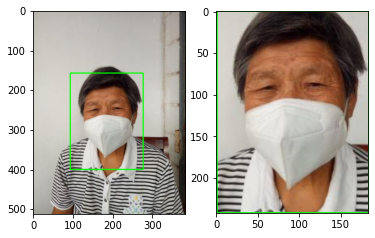

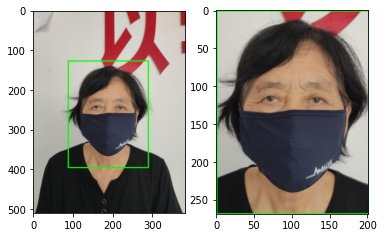

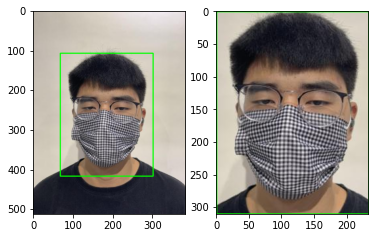

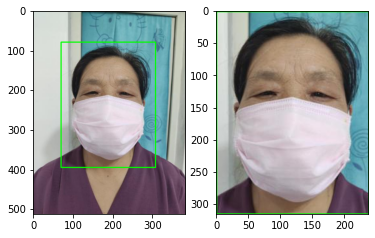

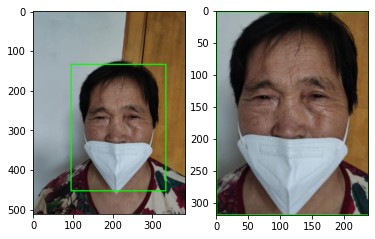

In [21]:
sample = train_crop_info.sample(5)
for path, s_X, s_Y, e_X, e_Y in np.array(sample):
    image = cv2.imread(path)
    s_X, s_Y, e_X, e_Y = resize_box(s_X, s_Y, e_X, e_Y, scale=1.2)
    cv2.rectangle(image, (s_X, s_Y), (e_X, e_Y), (0,255,0), 2)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    after_crop = image[s_Y:e_Y,s_X:e_X]
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(after_crop)

# Save Trainset

In [34]:
save_root = '/opt/ml/input/data/train/crop_images/'

scale = 1.2

for path, s_X, s_Y, e_X, e_Y in tqdm(np.array(train_crop_info)):
    folder, file = path.split('/')[-2:]
    
    s_X, s_Y, e_X, e_Y = resize_box(s_X, s_Y, e_X, e_Y, scale=scale)

    save_dir = os.path.join(save_root, folder)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, file)

    before_crop = cv2.imread(path)
    after_crop = before_crop[s_Y:e_Y,s_X:e_X]
    
    
    after_resize = cv2.resize(after_crop, dsize=(288, 384), interpolation=cv2.INTER_LINEAR)
    
    if not cv2.imwrite(save_path, after_resize):
        print("실패")


100%|██████████| 18900/18900 [02:05<00:00, 150.09it/s]


## Save Testset

In [35]:
test_crop_info = pd.read_csv("total_test_crop.csv")

In [49]:
save_root = '/opt/ml/input/data/eval/crop_images/'
if not os.path.exists(save_root):
    os.makedirs(save_root)
scale = 1.2


for path, s_X, s_Y, e_X, e_Y in tqdm(np.array(test_crop_info)):
    file = path.split('/')[-1]
    
    s_X, s_Y, e_X, e_Y = resize_box(s_X, s_Y, e_X, e_Y, scale=scale)

    save_path = os.path.join(save_root, file)
    
    before_crop = cv2.imread(path)
    after_crop = before_crop[s_Y:e_Y,s_X:e_X]
    
    
    after_resize = cv2.resize(after_crop, dsize=(288, 384), interpolation=cv2.INTER_LINEAR)

    if not cv2.imwrite(save_path, after_resize):
        print("실패")


100%|██████████| 12600/12600 [01:16<00:00, 164.89it/s]
